In [33]:
import sys 
sys.path.insert(1, "../")
from workloads.util import use_plots

import seaborn as sns 
from matplotlib import pyplot as plt
sns.set()

import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [542]:
policy_map = {
    'total_error': 'Regret-Optimized',
    'total_error_cold': 'Regret-Optimized',
    'min_past': 'Minimum-Past', 
    'round_robin': "Round-Robin", 
    'max_pending': "Maximum-Pending", 
    'last_query': "Read-Optimized", 
    "query_proportional": "Query-Proportional",
    "batch": "Batched", 
    'random': "Random"
}
hue_order = ['Regret-Optimized', "Query-Proportional", "Random", "Batched", "Round-Robin", 'Minimum-Past', "Maximum-Pending"]

In [544]:
colors = sns.color_palette(as_cmap=True)
hue_colors = {hue_order[i]: colors[i] for i in range(len(hue_order))}
hue_colors

{'Regret-Optimized': (0.2980392156862745,
  0.4470588235294118,
  0.6901960784313725),
 'Query-Proportional': (0.8666666666666667,
  0.5176470588235295,
  0.3215686274509804),
 'Random': (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 'Batched': (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 'Round-Robin': (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 'Minimum-Past': (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 'Maximum-Pending': (0.8549019607843137,
  0.5450980392156862,
  0.7647058823529411)}

In [546]:
plots_dir = use_plots("wikipedia", download=False)
wiki_df = pd.read_csv(f"{plots_dir}/results.csv")
wiki_df = wiki_df[wiki_df["policy"] != "total_error_cold"]
wiki_df["error"] = 1-wiki_df["top1_error"]
wiki_df["workload"] = "Information Retrieval"
wiki_df.policy = wiki_df.policy.map(policy_map)

wiki_baseline_df = pd.read_csv(f"{plots_dir}/baseline.csv")
wiki_upper_bound = 1-wiki_baseline_df[wiki_baseline_df["policy"] == "upper_bound"].top1_error.iloc[0]
wiki_upper_bound_updates = wiki_baseline_df[wiki_baseline_df["policy"] == "upper_bound"].total_updates.iloc[0]
wiki_lower_bound = 1-wiki_baseline_df[wiki_baseline_df["policy"] == "lower_bound"].top1_error.iloc[0]
wiki_lower_bound_updates = wiki_baseline_df[wiki_baseline_df["policy"] == "lower_bound"].total_updates.iloc[0]

print(wiki_upper_bound, wiki_lower_bound)
wiki_baseline_df

{'results_dir': '/Users/sarahwooders/repos/experiments/data//results', 'dataset_dir': '/Users/sarahwooders/repos/experiments/data//datasets', 'plots_dir': '/Users/sarahwooders/repos/experiments/data//plots', 'aws_dir': 'vldb', 'credentials': '/Users/sarahwooders/repos/experiments//ralf-vldb.json'}
0.7527672955974842 0.9374449685534592


,Unnamed: 0,policy,top1_error,top5_error,total_updates
0,0,upper_bound,0.247233,0.506502,16342
1,1,lower_bound,0.062555,0.110440,16342


In [547]:
plots_dir = use_plots("yahoo_a1", download=False)
stl_df = pd.read_csv(f"{plots_dir}/results.csv")
stl_updates_df = pd.read_csv(f"{plots_dir}/updates.csv")
stl_df["error"] = stl_df["total_error"] 
stl_df["updates"] = stl_df["runtime"].apply(lambda r: int(24/r) if r > 0 else "infinity")
stl_updates_df["updates"] = stl_updates_df["runtime"].apply(lambda r: int(24/r) if r > 0 else "infinity")
stl_df["workload"] = "Anomaly Detection"
stl_df.policy = stl_df.policy.map(policy_map)
stl_updates_df.policy = stl_updates_df.policy.map(policy_map)

stl_baseline_df = pd.read_csv(f"{plots_dir}/baseline.csv")
stl_upper_bound = stl_baseline_df[stl_baseline_df["policy"] == "All"].total_error.iloc[0]
stl_upper_bound_updates = stl_baseline_df[stl_baseline_df["policy"] == "All"].total_updates.iloc[0]
stl_lower_bound = stl_baseline_df[stl_baseline_df["policy"] == "None"].total_error.iloc[0]
stl_lower_bound_updates = stl_baseline_df[stl_baseline_df["policy"] == "None"].total_updates.iloc[0]

stl_baseline_df

{'results_dir': '/Users/sarahwooders/repos/experiments/data//results', 'dataset_dir': '/Users/sarahwooders/repos/experiments/data//datasets', 'plots_dir': '/Users/sarahwooders/repos/experiments/data//plots', 'aws_dir': 'vldb', 'credentials': '/Users/sarahwooders/repos/experiments//ralf-vldb.json'}


,Unnamed: 0.1,Unnamed: 0,runtime,policy,total_error,average_staleness,total_updates
0,0,0,0,All,90.793787,0.998466,43684
1,0,0,1000000,None,880.302334,325.500000,1


In [548]:
plots_dir = use_plots("ml-1m", download=False)
als_df = pd.read_csv(f"{plots_dir}/results.csv")
als_updates_df = pd.read_csv(f"{plots_dir}/updates.csv")
als_df["workload"] = "Recommendation"
als_df.policy = als_df.policy.map(policy_map)

als_baseline_df = pd.read_csv(f"{plots_dir}/baseline.csv")
als_upper_bound = als_baseline_df[als_baseline_df["updates"] == 10000].error.iloc[0]
als_upper_bound_updates = als_baseline_df[als_baseline_df["updates"] == 10000].total_updates.iloc[0]
als_lower_bound = als_baseline_df[als_baseline_df["updates"] == 0].error.iloc[0]
als_lower_bound_updates = als_baseline_df[als_baseline_df["updates"] == 0].total_updates.iloc[0] 

print(als_upper_bound, als_lower_bound)
als_baseline_df

{'results_dir': '/Users/sarahwooders/repos/experiments/data//results', 'dataset_dir': '/Users/sarahwooders/repos/experiments/data//datasets', 'plots_dir': '/Users/sarahwooders/repos/experiments/data//plots', 'aws_dir': 'vldb', 'credentials': '/Users/sarahwooders/repos/experiments//ralf-vldb.json'}
1.1169459005554807 6.294494356144663


,Unnamed: 0,updates,error,total_updates,ts_factor,max_ts
0,0,0,6.294494,0,60,20018
1,1,10000,1.116946,25497,60,20018


In [51]:
results_df = pd.concat([
    wiki_df[["workload", "policy", "error", "total_updates", "updates"]],
    stl_df[["workload", "policy", "error", "total_updates", "updates"]],
    als_df[["workload", "policy", "error", "total_updates", "updates"]]
])
results_df

,workload,policy,error,total_updates,updates
0,Information Retrieval,Round-Robin,0.064237,40,0.001
1,Information Retrieval,Regret Optimized,0.112445,40,0.001
2,Information Retrieval,Query Proportional,0.114347,40,0.001
3,Information Retrieval,Random,0.064363,40,0.001
4,Information Retrieval,Round-Robin,0.072335,200,0.005
...,...,...,...,...,...
46,Recommendation,Round-Robin,5.210594,0,NaN
47,Recommendation,Batched,1.492968,32892,0.500
48,Recommendation,Batched,2.740427,13014,0.200
49,Recommendation,Batched,1.179027,65797,1.000


In [497]:
sns.set_theme(style="whitegrid")
sns.set_theme(style="whitegrid", font_scale=1.7)
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

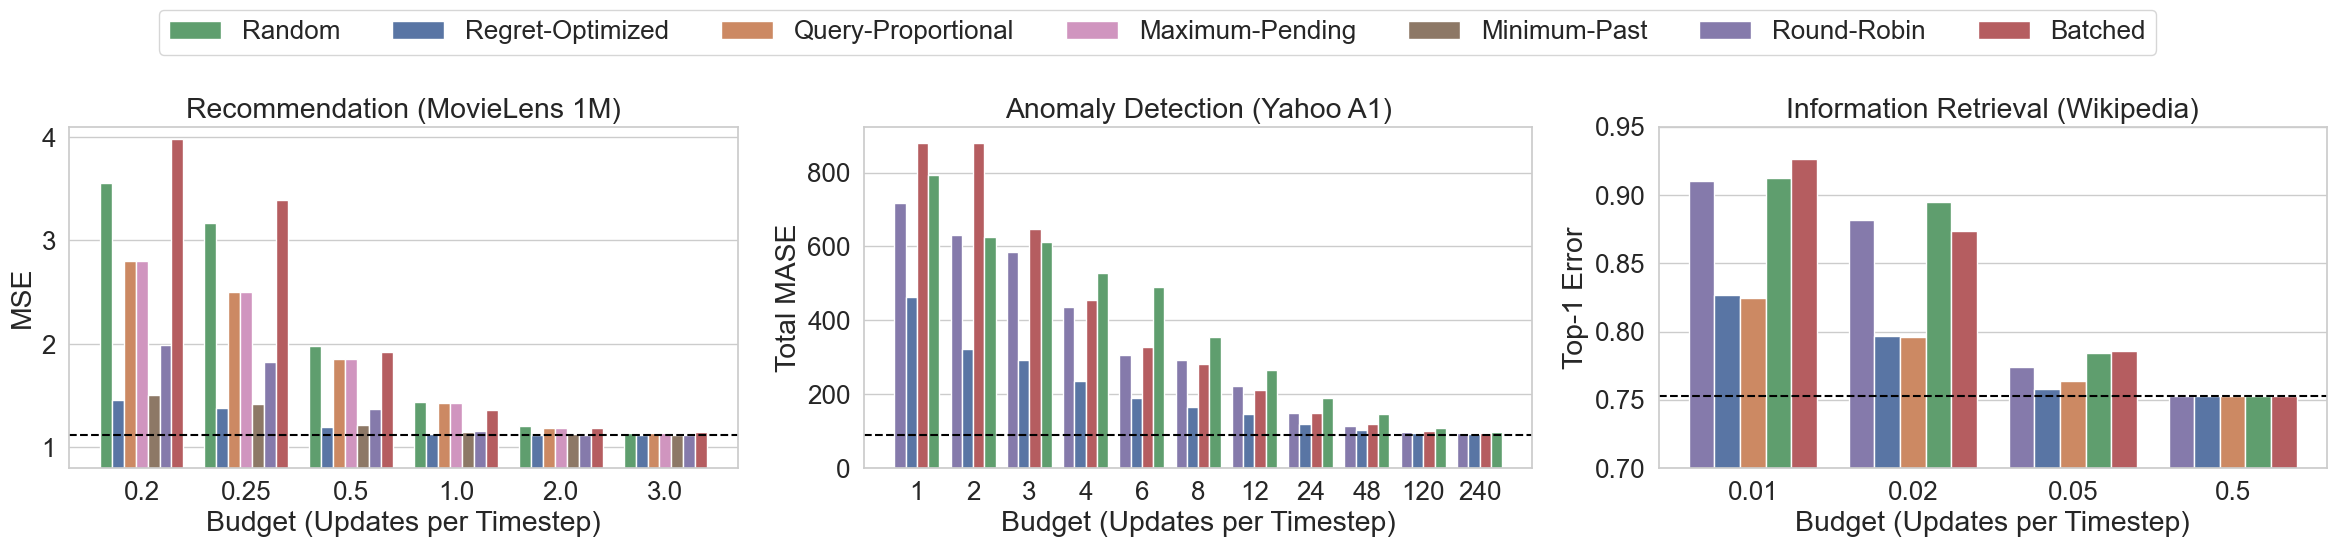

In [549]:
fig, axes = plt.subplots(1, 3, figsize=(24,5))

updates = [0.5, 0.25, 0.2, 1, 2, 3]
g0 = sns.barplot(data=als_df[als_df.updates.isin(updates)], x="updates", y="error", hue="policy", ax=axes[0], palette=hue_colors)
axes[0].set(title="Recommendation (MovieLens 1M)", xlabel="Budget (Updates per Timestep)",  ylabel="MSE", ylim=(0.8, 4.1))
g0.axline((0, als_upper_bound), (0.1, als_upper_bound), color='black', linestyle="--")
g0.legend_.remove()

updates = [1, 2, 3, 4, 6, 8, 12, 24, 48, 120, 240]
g1 = sns.barplot(data=stl_df[stl_df.updates.isin(updates)], x="updates", y="error", hue="policy", ax=axes[1], palette=hue_colors)
axes[1].set(title="Anomaly Detection (Yahoo A1)", xlabel="Budget (Updates per Timestep)",  ylabel="Total MASE")
g1.axline((0, stl_upper_bound), (0.1, stl_upper_bound), color='black', linestyle="--")
g1.legend_.remove()

#updates = [0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 1]
updates = [0.01, 0.02, 0.03, 0.04, 0.05, 0.5, 1]
g2 = sns.barplot(data=wiki_df[wiki_df.updates.isin(updates)], x="updates", y="error", hue="policy", ax=axes[2], palette=hue_colors)
axes[2].set(title="Information Retrieval (Wikipedia)", xlabel="Budget (Updates per Timestep)",  ylabel="Top-1 Error", ylim=(0.7, 0.95))
g2.axline((0, wiki_upper_bound), (0.1, wiki_upper_bound), color='black', linestyle="--")
g2.legend_.remove()

handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, bbox_to_anchor=(1.15, 0.8))
fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 1))
fig.tight_layout()
fig.savefig('../data/plots/bar_all.pdf', dpi=300, bbox_inches = "tight")

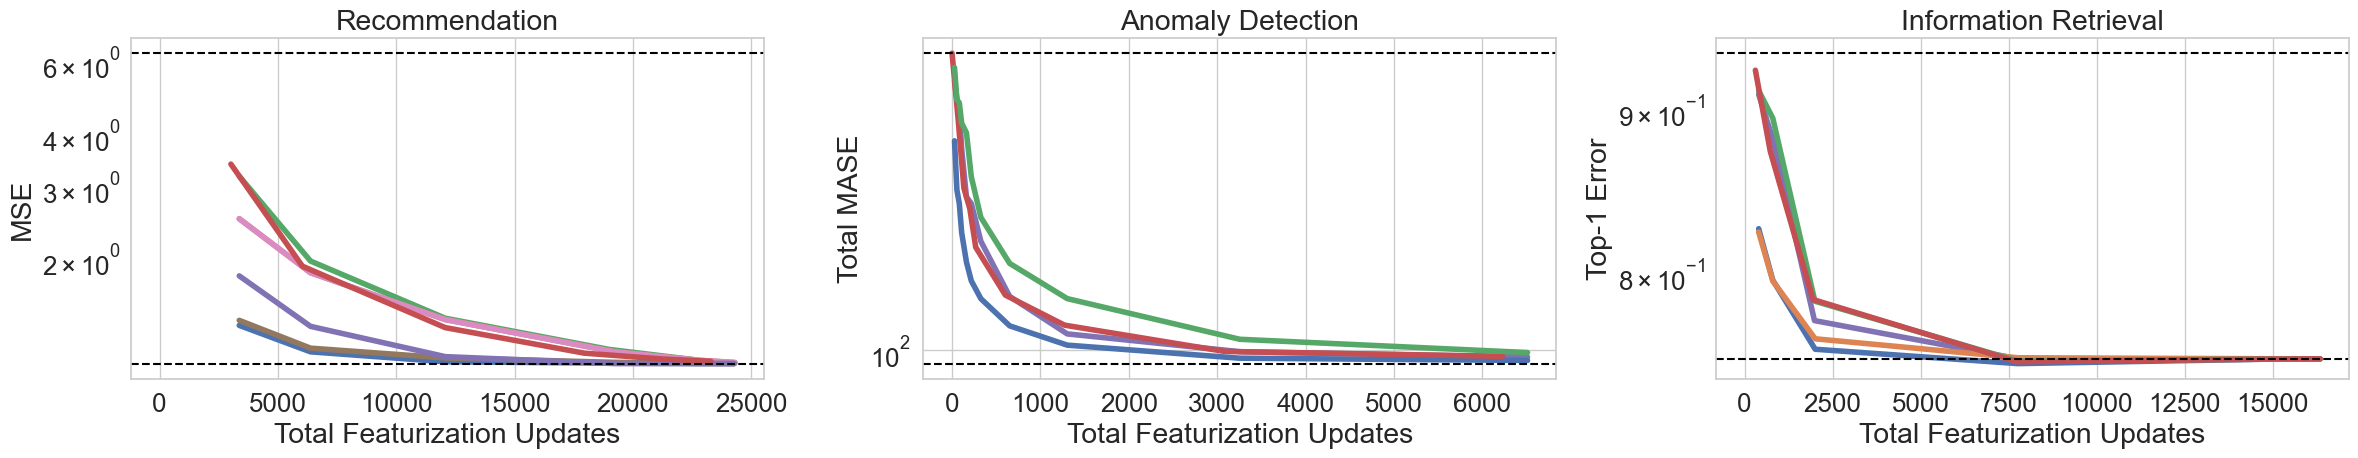

In [522]:
fig, axes = plt.subplots(1, 3, figsize=(24,5))
linewidth = 4

updates = [0.25, 0.5, 1, 2, 3, 4, 6]
g0 = sns.lineplot(data=als_df[als_df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[0], palette=hue_colors, linewidth=linewidth)
axes[0].set(title="Recommendation", xlabel="Total Featurization Updates",  ylabel="MSE", yscale="log")
g0.axline((5000, als_upper_bound), (1, als_upper_bound), color='black', linestyle="--")
g0.axline((5000, als_lower_bound), (1, als_lower_bound), color='black', linestyle="--")
g0.legend_.remove()

updates = [1, 2, 3, 4, 6, 8, 12, 24, 48, 120, 240]
g1 = sns.lineplot(data=stl_df[stl_df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[1], palette=hue_colors, linewidth=linewidth)
axes[1].set(title="Anomaly Detection", xlabel="Total Featurization Updates",  ylabel="Total MASE", yscale="log")
g1.axline((0, stl_upper_bound), (0.1, stl_upper_bound), color='black', linestyle="--")
g1.axline((0, stl_lower_bound), (0.1, stl_lower_bound), color='black', linestyle="--")
#g1.axvline(stl_lower_bound_updates, linewidth=2, color='black', linestyle="--")
g1.legend_.remove()

updates = [0.01, 0.02, 0.03, 0.04, 0.05, 0.2, 0.4, 0.5, 0.75]
g2 = sns.lineplot(data=wiki_df[wiki_df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[2], palette=hue_colors, linewidth=linewidth)
axes[2].set(title="Information Retrieval", xlabel="Total Featurization Updates",  ylabel="Top-1 Error", yscale="log")
g2.axline((0, wiki_upper_bound), (0.1, wiki_upper_bound), color='black', linestyle="--")
g2.axline((0, wiki_lower_bound), (0.1, wiki_lower_bound), color='black', linestyle="--")
g2.legend_.remove()

handles, labels = axes[2].get_legend_handles_labels()
#fig.legend(handles, labels, bbox_to_anchor=(1.2, 0.8))
#fig.legend(handles, labels, bbox_to_anchor=(1.15, 0.8))
fig.tight_layout()

fig.savefig('../data/plots/line_all.pdf', dpi=300, bbox_inches = "tight")

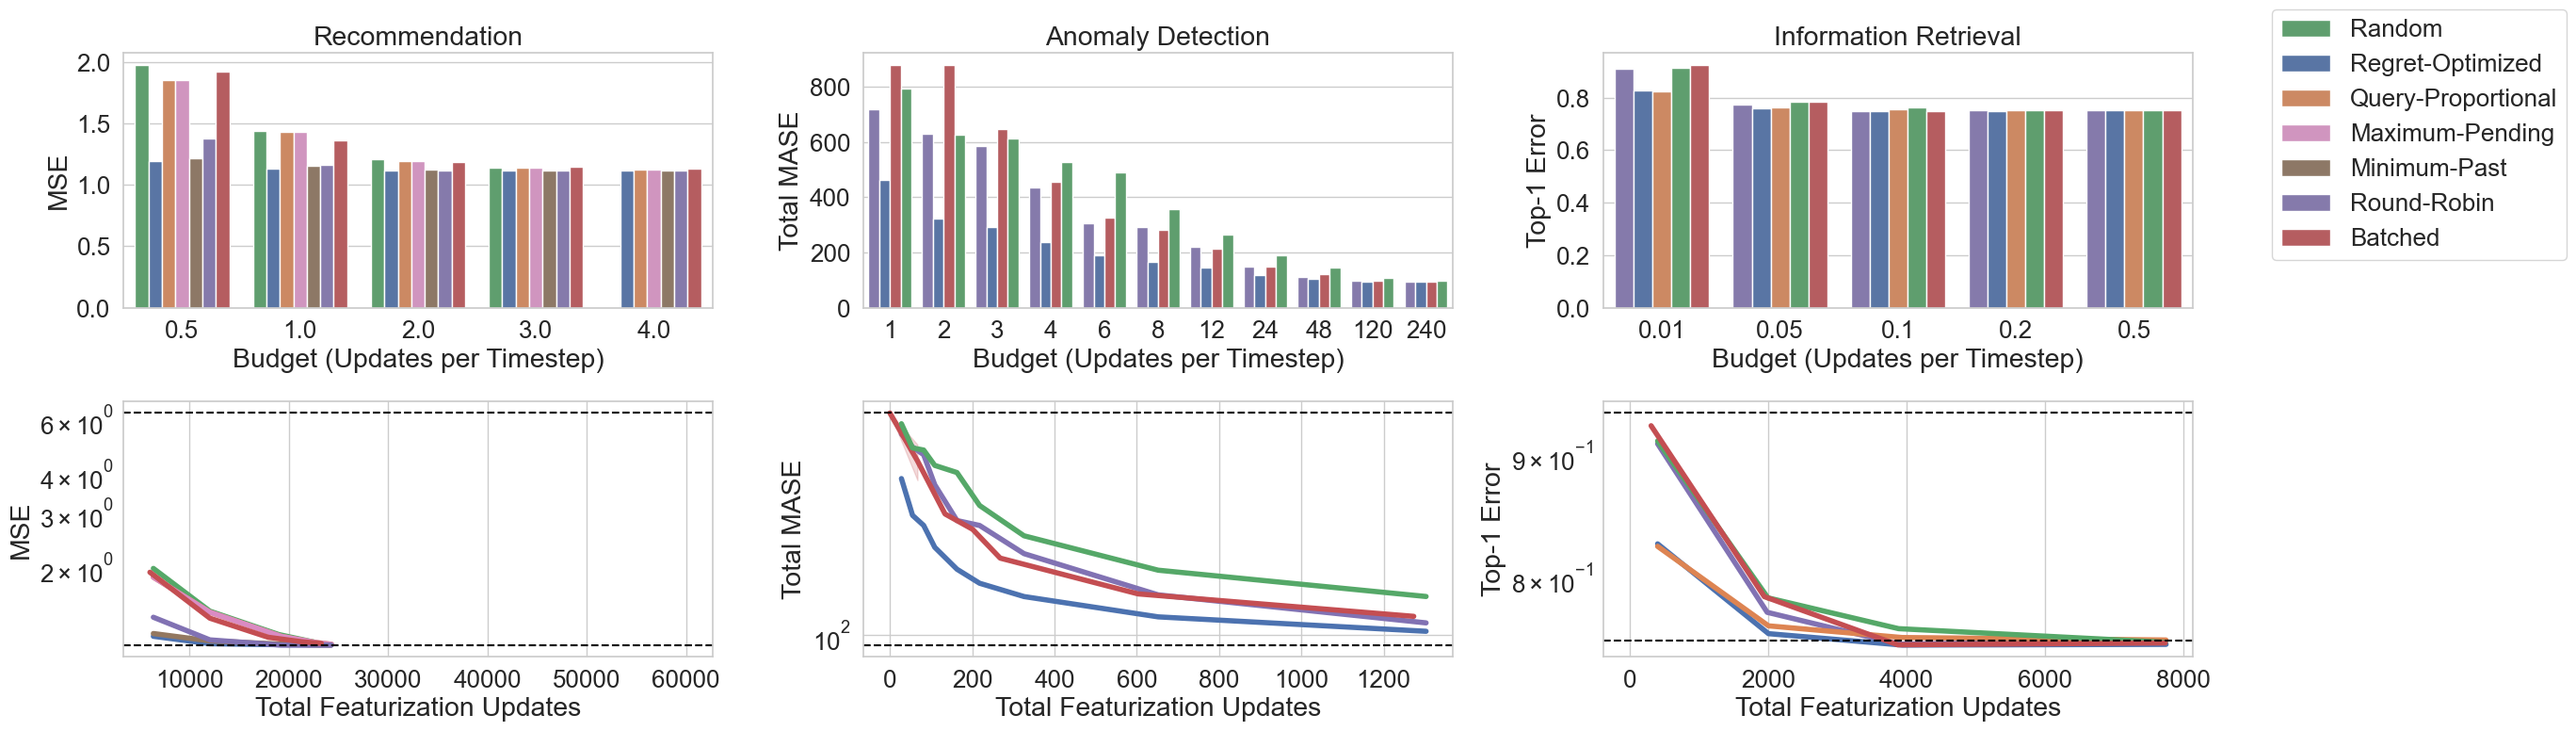

In [550]:
fig, axes = plt.subplots(2, 3, figsize=(24,8))

updates = [0.5, 1, 2, 3, 4, 6]
g0 = sns.barplot(data=als_df[als_df.updates.isin(updates)], x="updates", y="error", hue="policy", ax=axes[0][0], palette=hue_colors)
axes[0][0].set(title="Recommendation", xlabel="Budget (Updates per Timestep)",  ylabel="MSE")
g0.legend_.remove()

updates = [1, 2, 3, 4, 6, 8, 12, 24, 48, 120, 240]
g1 = sns.barplot(data=stl_df[stl_df.updates.isin(updates)], x="updates", y="error", hue="policy", ax=axes[0][1], palette=hue_colors)
axes[0][1].set(title="Anomaly Detection", xlabel="Budget (Updates per Timestep)",  ylabel="Total MASE")
g1.legend_.remove()

updates = [0.01, 0.05, 0.1, 0.2, 0.5, 1]
g2 = sns.barplot(data=wiki_df[wiki_df.updates.isin(updates)], x="updates", y="error", hue="policy", ax=axes[0][2], palette=hue_colors)
axes[0][2].set(title="Information Retrieval", xlabel="Budget (Updates per Timestep)",  ylabel="Top-1 Error")
g2.legend_.remove()


updates = [0.5, 1, 2, 3, 4, 6]
g0 = sns.lineplot(data=als_df[als_df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[1][0], palette=hue_colors, linewidth=linewidth)
axes[1][0].set(title="", xlabel="Total Featurization Updates",  ylabel="MSE", yscale="log")
g0.axline((50000, als_upper_bound), (60000, als_upper_bound), color='black', linestyle="--")
g0.axline((50000, als_lower_bound), (60000, als_lower_bound), color='black', linestyle="--")
g0.legend_.remove()

updates = [1, 2, 3, 4, 6, 8, 12, 24, 48]
g1 = sns.lineplot(data=stl_df[stl_df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[1][1], palette=hue_colors, linewidth=linewidth)
axes[1][1].set(title="", xlabel="Total Featurization Updates",  ylabel="Total MASE", yscale="log")
g1.axline((0, stl_upper_bound), (0.1, stl_upper_bound), color='black', linestyle="--")
g1.axline((0, stl_lower_bound), (0.1, stl_lower_bound), color='black', linestyle="--")
#g1.axvline(stl_lower_bound_updates, linewidth=2, color='black', linestyle="--")
g1.legend_.remove()

updates = [0.01, 0.05, 0.1, 0.2]
g2 = sns.lineplot(data=wiki_df[wiki_df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[1][2], palette=hue_colors, linewidth=linewidth)
axes[1][2].set(title="", xlabel="Total Featurization Updates",  ylabel="Top-1 Error", yscale="log")
g2.axline((0, wiki_upper_bound), (0.1, wiki_upper_bound), color='black', linestyle="--")
g2.axline((0, wiki_lower_bound), (0.1, wiki_lower_bound), color='black', linestyle="--")
g2.legend_.remove()

handles, labels = axes[0][0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.15, 1))
#fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, -0.1))
fig.tight_layout()

fig.savefig('../data/plots/results_all.pdf')

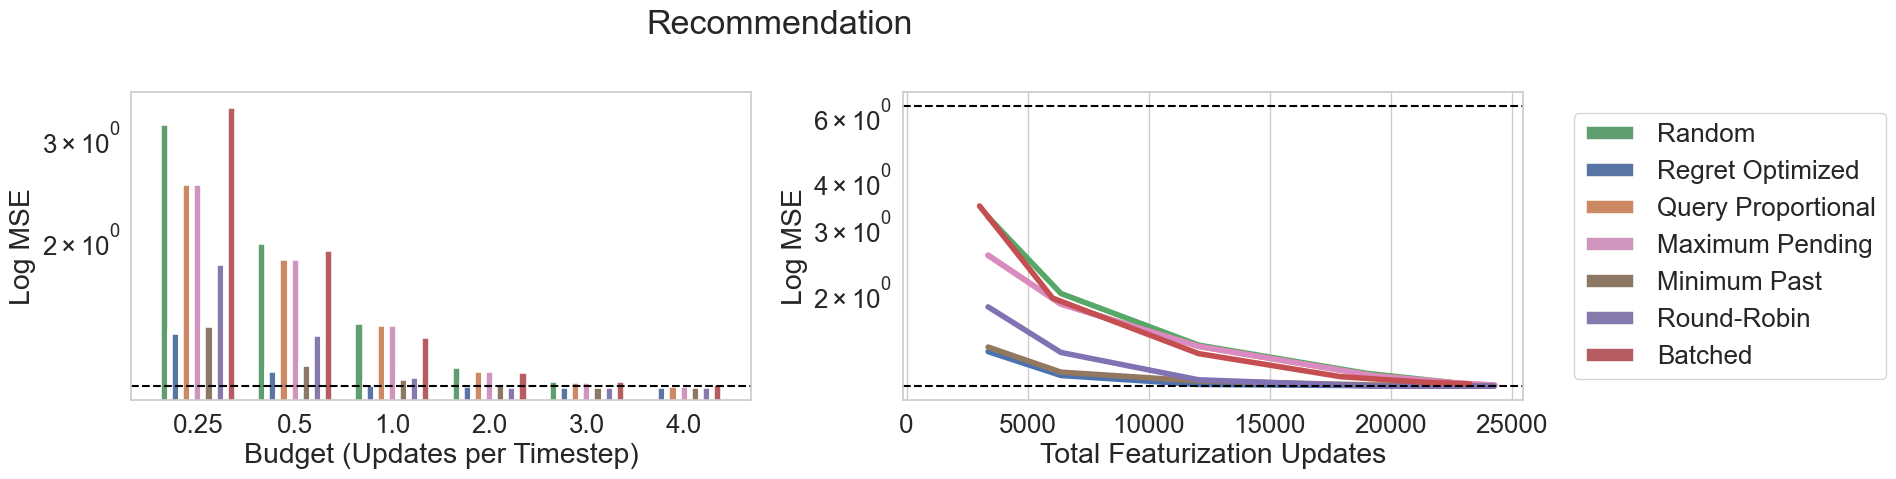

In [338]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Recommendation')


updates = [0.25, 0.5, 1, 2, 3, 4, 6]
g0 = sns.barplot(data=als_df[als_df.updates.isin(updates)], x="updates", y="error", hue="policy", ax=axes[0], palette=hue_colors, linewidth=linewidth)
axes[0].set(title="", xlabel="Budget (Updates per Timestep)",  ylabel="Log MSE", yscale="log")
g0.axline((0.5, als_upper_bound), (1, als_upper_bound), color='black', linestyle="--")
g0.legend_.remove()

g1 = sns.lineplot(data=als_df[als_df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[1], palette=hue_colors, linewidth=linewidth)
axes[1].set(title="", xlabel="Total Featurization Updates",  ylabel="Log MSE", yscale="log")
g1.axline((1000, als_upper_bound), (2000, als_upper_bound), color='black', linestyle="--")
g1.axline((1000, als_lower_bound), (2000, als_lower_bound), color='black', linestyle="--")
g1.legend_.remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.2, 0.8))
fig.tight_layout()


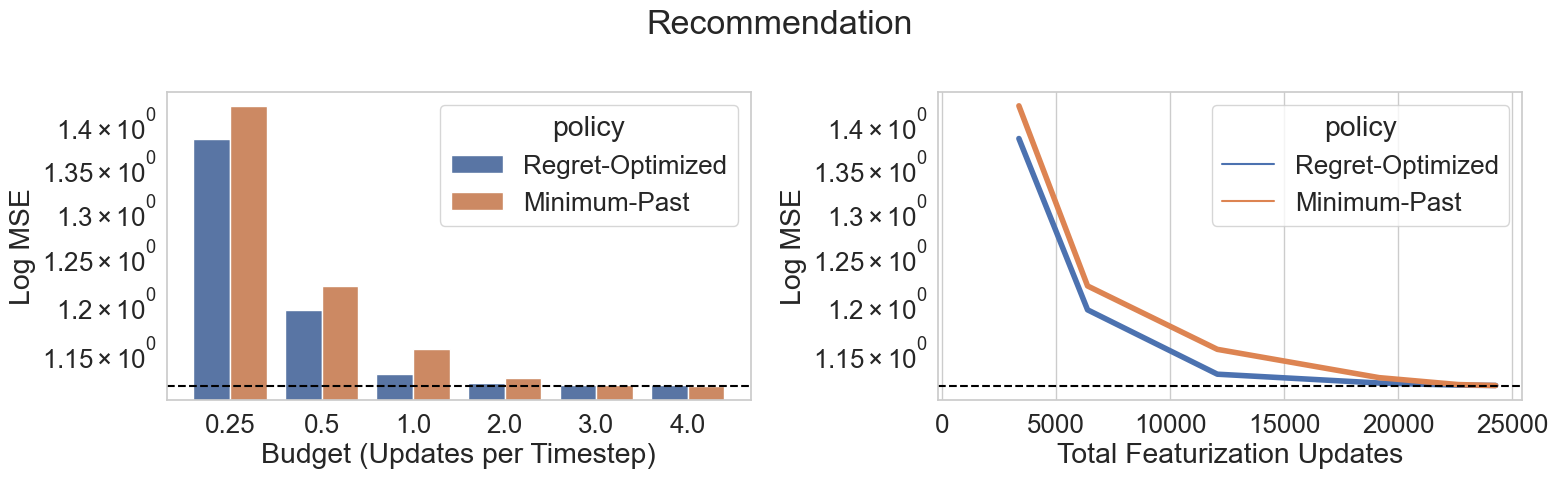

In [553]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Recommendation')


updates = [0.25, 0.5, 1, 2, 3, 4, 6]
g0 = sns.barplot(data=als_df[(als_df.updates.isin(updates)) & (als_df.policy.isin(["Regret-Optimized", "Minimum-Past"]))], x="updates", y="error", hue="policy", ax=axes[0])
axes[0].set(title="", xlabel="Budget (Updates per Timestep)",  ylabel="Log MSE", yscale="log")
g0.axline((0, als_upper_bound), (1, als_upper_bound), color='black', linestyle="--")
#g0.legend_.remove()

g1 = sns.lineplot(data=als_df[(als_df.updates.isin(updates)) & (als_df.policy.isin(["Regret-Optimized", "Minimum-Past"]))], x="total_updates", y="error", hue="policy", ax=axes[1], linewidth=linewidth)
axes[1].set(title="", xlabel="Total Featurization Updates",  ylabel="Log MSE", yscale="log")
g1.axline((1000, als_upper_bound), (2000, als_upper_bound), color='black', linestyle="--")
#g1.legend_.remove()

handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, bbox_to_anchor=(1, 0.8))
fig.tight_layout()

fig.savefig('../data/plots/recommendation_best_baseline.pdf')

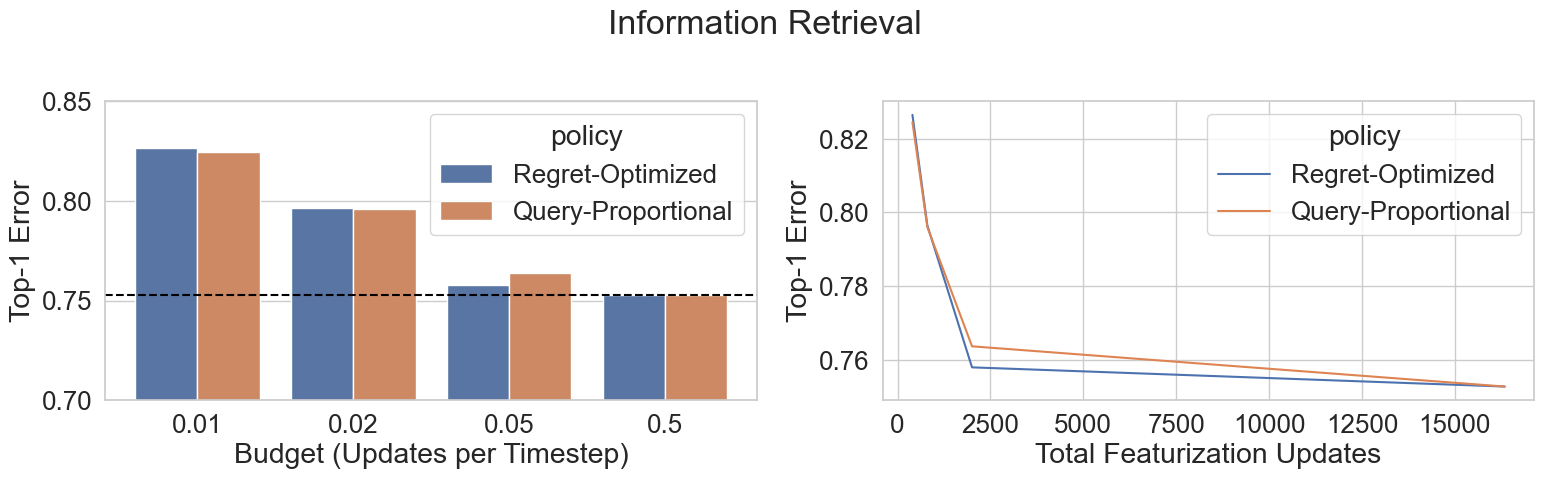

In [552]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Information Retrieval')


#updates = [0.01, 0.05, 0.1, 0.2, 0.5, 1]
#updates = [0.01, 0.02, 0.03, 0.04, 0.05, 0.2, 0.4, 0.5, 0.75]
updates = [0.01, 0.02, 0.03, 0.04, 0.05, 0.5, 1]
g0 = sns.barplot(data=wiki_df[(wiki_df.updates.isin(updates)) & (wiki_df.policy.isin(["Regret-Optimized", "Query-Proportional"]))], x="updates", y="error", hue="policy", ax=axes[0])
axes[0].set(title="", xlabel="Budget (Updates per Timestep)",  ylabel="Top-1 Error", ylim=(0.7, 0.85))
g0.axline((0, wiki_upper_bound), (1, wiki_upper_bound), color='black', linestyle="--")
#g0.legend_.remove()

g1 = sns.lineplot(data=wiki_df[(wiki_df.updates.isin(updates)) & (wiki_df.policy.isin(["Regret-Optimized", "Query-Proportional"]))], x="total_updates", y="error", hue="policy", ax=axes[1])
axes[1].set(title="", xlabel="Total Featurization Updates",  ylabel="Top-1 Error")
#g1.legend_.remove()

handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels)
fig.tight_layout()

fig.savefig('../data/plots/ir_best_baseline.pdf')

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Information Retrieval')


updates = [1, 4, 5, 120, 240]
g0 = sns.barplot(data=stl_df[(stl_df.updates.isin(updates)) & (stl_df.policy.isin(["Regret Optimized", "Query Proportional"]))], x="updates", y="error", hue="policy", ax=axes[0])
axes[0].set(title="", xlabel="Budget (Updates per Timestep)",  ylabel="Log MSE", yscale="log")
g0.legend_.remove()

g1 = sns.lineplot(data=wiki_df[(wiki_df.updates.isin(updates)) & (wiki_df.policy.isin(["Regret Optimized", "Query Proportional"]))], x="total_updates", y="error", hue="policy", ax=axes[1])
axes[1].set(title="", xlabel="Total Featurization Updates",  ylabel="Log MSE", yscale="log")
g1.legend_.remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.2, 0.8))
fig.tight_layout()

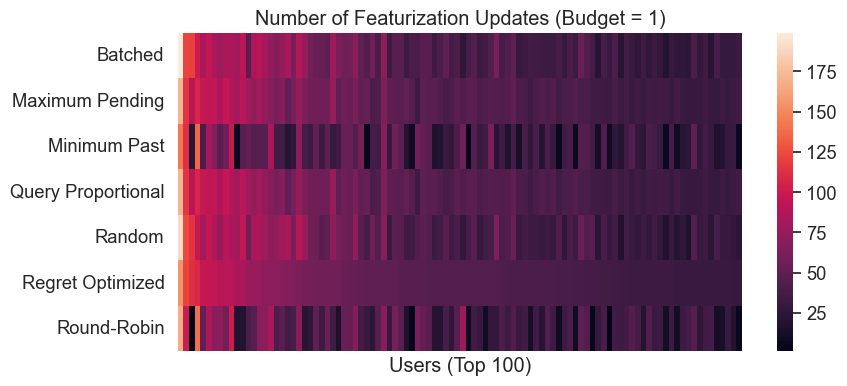

In [489]:
updates = 1
hist_df = als_updates_df[ als_updates_df["updates"] == updates].groupby(by=["key", "policy"]).updates.count().apply(lambda x: x/1).reset_index()
hist_df["user_id"] = hist_df["key"]
hist_df["policy"] = hist_df.policy.map(policy_map)
hist_df = hist_df.dropna()
heat_df = hist_df.pivot("policy", "user_id", "updates").sort_values("Regret Optimized", axis=1, ascending=False).fillna(0)
f, ax = plt.subplots(figsize=(8, 4))
plt.tight_layout()
sns.set_theme(style="whitegrid", font_scale=1.2)

g = sns.heatmap(
    heat_df.iloc[:, :100], 
    annot=False, 
    cbar=True,  
    #yticklabels=["Regret Optimized", "Maximum Pending", "Minimum Past", "Round Robin"],
    #xticklabels=range(1, 100, 1),
    square=False,
    ax=ax
)
g.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
ax.set_xlabel(f"Users (Top 100)")
ax.set_ylabel(None)
ax.set_title(f"Number of Featurization Updates (Budget = {updates})")
#plt.legend(fontsize='x-large')
f.savefig('../data/plots/als_heatmap.pdf', dpi=300, bbox_inches = "tight")

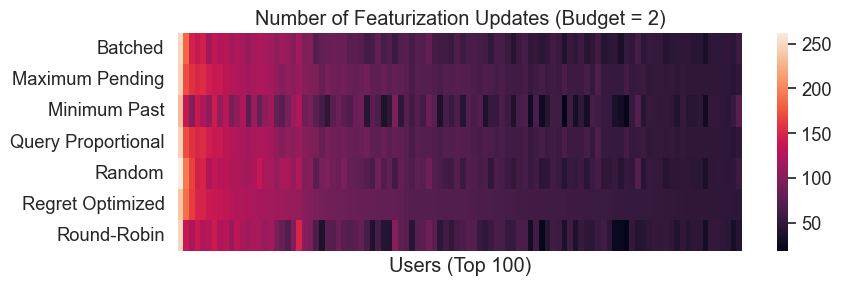

In [493]:
updates = 2
hist_df = als_updates_df[ als_updates_df["updates"] == updates].groupby(by=["key", "policy"]).updates.count().apply(lambda x: x/1).reset_index()
hist_df["user_id"] = hist_df["key"]
hist_df["policy"] = hist_df.policy.map(policy_map)
hist_df = hist_df.dropna()
heat_df = hist_df.pivot("policy", "user_id", "updates").sort_values("Regret Optimized", axis=1, ascending=False).fillna(0)
f, ax = plt.subplots(figsize=(8, 3))
plt.tight_layout()
sns.set_theme(style="whitegrid", font_scale=1.2)

g = sns.heatmap(
    heat_df.iloc[:, :100], 
    annot=False, 
    cbar=True,  
    #yticklabels=["Regret Optimized", "Maximum Pending", "Minimum Past", "Round Robin"],
    #xticklabels=range(1, 100, 1),
    square=False,
    ax=ax
)
g.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
ax.set_xlabel(f"Users (Top 100)")
ax.set_ylabel(None)
ax.set_title(f"Number of Featurization Updates (Budget = {updates})")
#plt.legend(fontsize='x-large')
f.savefig('../data/plots/als_heatmap.pdf', dpi=300, bbox_inches = "tight")

      key            policy  updates  user_id
0     1.0           Batched        4        1
1     1.0            Random        7        1
2     1.0  Regret Optimized        3        1
3     1.0       Round-Robin        5        1
4     2.0           Batched        4        2
..    ...               ...      ...      ...
263  66.0       Round-Robin        4       66
264  67.0           Batched        4       67
265  67.0            Random        7       67
266  67.0  Regret Optimized        4       67
267  67.0       Round-Robin        4       67

[268 rows x 4 columns]


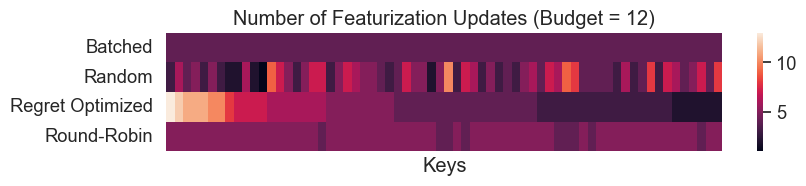

In [492]:
updates = 12
hist_df = stl_updates_df[stl_updates_df["updates"] == updates].groupby(by=["key", "policy"]).updates.count().reset_index()
hist_df["user_id"] = hist_df["key"].astype(int)
hist_df = hist_df.dropna()
print(hist_df)
heat_df = hist_df.pivot("policy", "user_id", "updates").sort_values("Regret Optimized", axis=1, ascending=False).fillna(0)
f, ax = plt.subplots(figsize=(8, 2))
plt.tight_layout()
sns.set_theme(style="whitegrid", font_scale=1.2)

g = sns.heatmap(
    heat_df.iloc[:, :66], 
    annot=False, 
    cbar=True,  
    #yticklabels=["Regret Optimized", "Maximum Pending", "Minimum Past", "Round Robin"],
    #xticklabels=range(1, 100, 1),
    square=False,
    ax=ax
)
g.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

ax.set_xlabel(f"Keys")
ax.set_ylabel(None)
ax.set_title(f"Number of Featurization Updates (Budget = {updates})")
#plt.legend(fontsize='x-large')
f.savefig('../data/plots/stl_heatmap.pdf', dpi=300, bbox_inches = "tight")

In [469]:
stl_updates_df[stl_updates_df["updates"] == 2.0]

,Unnamed: 0.1,Unnamed: 0,runtime,policy,key,i,time,updates
49780,0,0,12.0,Round-Robin,1.0,0.0,48.0,2
49781,1,1,12.0,Round-Robin,2.0,0.0,60.0,2
49782,2,2,12.0,Round-Robin,3.0,0.0,72.0,2
49783,3,3,12.0,Round-Robin,4.0,0.0,84.0,2
49784,4,4,12.0,Round-Robin,5.0,0.0,96.0,2
...,...,...,...,...,...,...,...,...
49940,50,50,12.0,Random,22.0,0.0,600.0,2
49941,51,51,12.0,Random,36.0,0.0,660.0,2
49942,52,52,12.0,Random,33.0,0.0,672.0,2
49943,53,53,12.0,Random,30.0,0.0,684.0,2
